In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/senate_county_candidate.csv')
df_sc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/senate_county.csv')
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')

pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14125 entries, 0 to 14124
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        14125 non-null  object
 1   county       14125 non-null  object
 2   candidate    14125 non-null  object
 3   party        14125 non-null  object
 4   total_votes  14125 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 551.9+ KB


In [17]:
#change column 'total_votes' to 'votes', add columns named 'won' 'total_votes' and 'votes/total_votes'
df1 = df.copy()
result = [False]*len(df)
county = df_sc['county']
current_votes = df_sc['current_votes']
total_votes = []
i = 0
for index, row in df1.iterrows():
    if  i < len(df_sc) and row['county'] == county.iloc[i]:
        result[index] = True
        i += 1
    total_votes.append(current_votes.iloc[i-1])
df1['won'] = result
df1['county'] = df1['county'].str.replace(' County', '')
df1.rename(columns={"total_votes": "winner_votes"}, inplace=True)
df1['total_votes'] = total_votes
df1['winner_votes/total_votes'] = df1['winner_votes'] / df1['total_votes']
df1.head()

,state,county,candidate,party,winner_votes,won,total_votes,winner_votes/total_votes
0,Delaware,Kent,Lauren Witzke,REP,38571,True,84975,0.453910
1,Delaware,Kent,Mark Turley,IPD,1553,False,84975,0.018276
2,Delaware,Kent,Nadine Frost,LIB,958,False,84975,0.011274
3,Delaware,New Castle,Lauren Witzke,REP,80081,True,279462,0.286554
4,Delaware,New Castle,Mark Turley,IPD,4277,False,279462,0.015304


In [ ]:
df1.head(20)

In [18]:
df_winner = df1.copy()
df_winner.drop(df_winner[df_winner['won'] == False].index, inplace = True)
df_winner['REP_won'] = df_winner['party'] == 'REP'
df_winner.info()

,state,county,candidate,party,winner_votes,won,total_votes,winner_votes/total_votes,REP_won
0,Delaware,Kent,Lauren Witzke,REP,38571,True,84975,0.453910,True
3,Delaware,New Castle,Lauren Witzke,REP,80081,True,279462,0.286554,True
6,Delaware,Sussex,Christopher Coons,DEM,56137,True,126498,0.443778,False
9,Georgia,Appling,Jon Ossoff,DEM,1753,True,8187,0.214120,False
11,Georgia,Atkinson,Jon Ossoff,DEM,773,True,3097,0.249596,False


In [19]:
df_winner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 14105
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     3582 non-null   object 
 1   county                    3582 non-null   object 
 2   candidate                 3582 non-null   object 
 3   party                     3582 non-null   object 
 4   winner_votes              3582 non-null   int64  
 5   won                       3582 non-null   bool   
 6   total_votes               3582 non-null   int64  
 7   winner_votes/total_votes  3580 non-null   float64
 8   REP_won                   3582 non-null   bool   
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 230.9+ KB


Text(0.5, 1.0, '2020 Republican Voting on Senate Election')

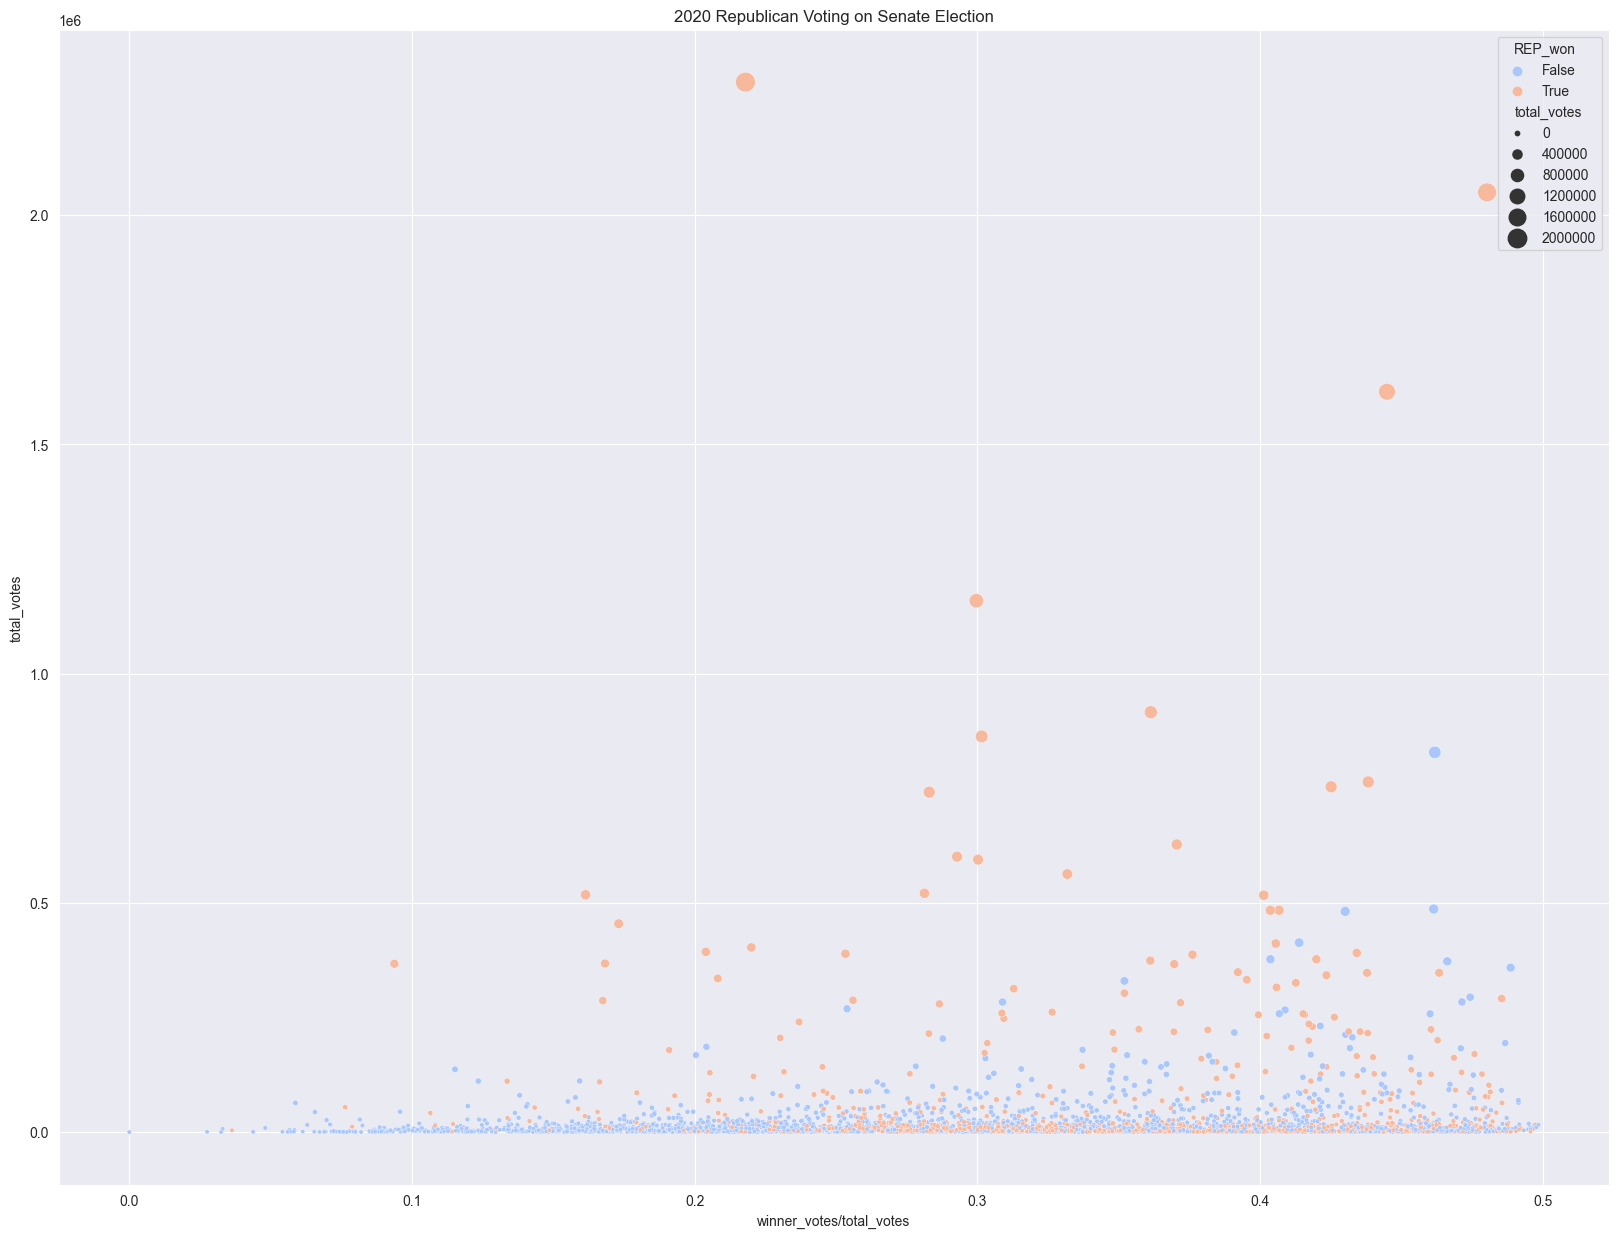

In [20]:
plt.figure(figsize = (20,15))
sns.scatterplot(data = df_winner, x = "winner_votes/total_votes", y = "total_votes", hue = "REP_won", size = "total_votes", palette = "coolwarm", sizes=(10,200))
plt.title("2020 Republican Voting on Senate Election")